In [238]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("algozee/heart-decices")

print("Path to dataset files:", path)

Path to dataset files: /Users/shubham/.cache/kagglehub/datasets/algozee/heart-decices/versions/1


In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
train_df = pd.read_csv('/Users/shubham/.cache/kagglehub/datasets/algozee/heart-decices/versions/1/train.csv')
test_df = pd.read_csv('/Users/shubham/.cache/kagglehub/datasets/algozee/heart-decices/versions/1/test.csv')

In [208]:
train_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [209]:
test_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


# EDA

In [210]:
train_df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [211]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Heart Disease  

In [212]:
train_df['Heart Disease'] = train_df['Heart Disease'].map({'Presence': 1,'Absence': 0})

<b> BOX plots to check the data spread 

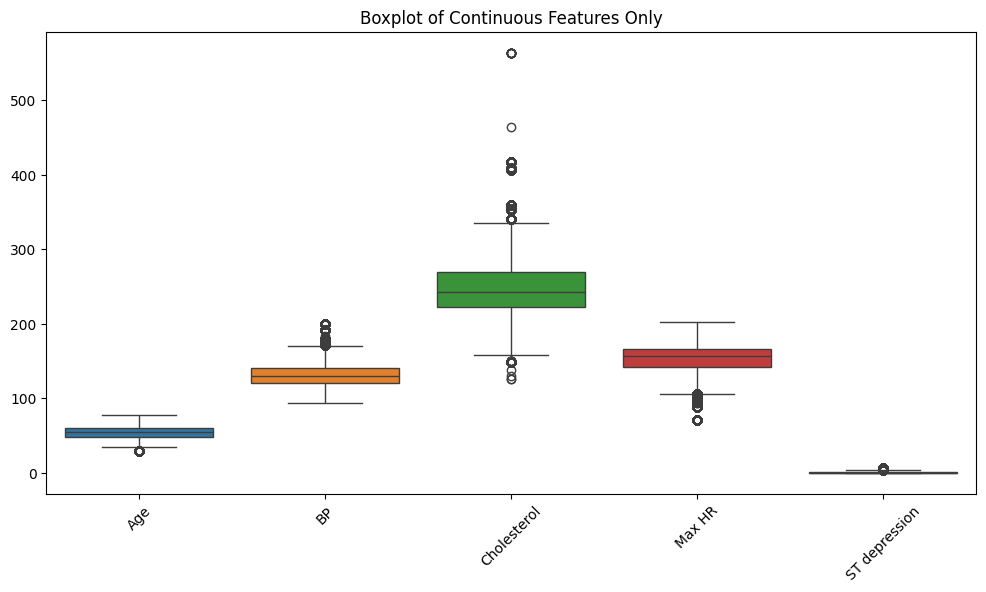

In [213]:
continuous_cols = [
    'Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'
]

plt.figure(figsize=(12,6))
sns.boxplot(data=train_df[continuous_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Continuous Features Only")
plt.show()

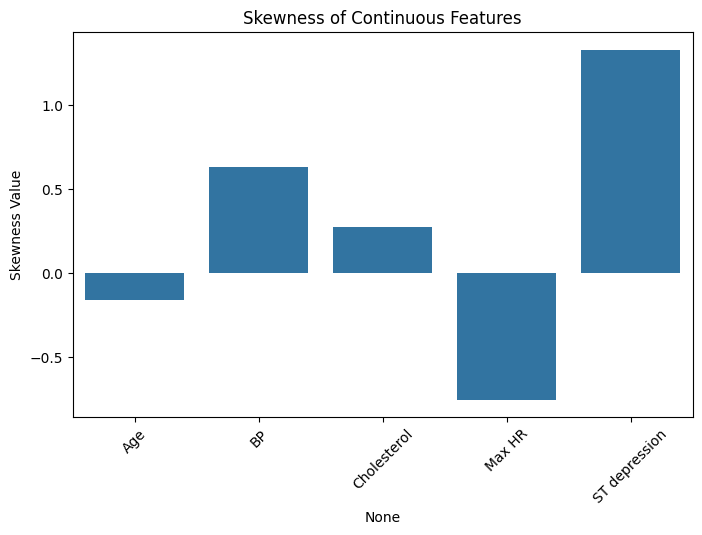

Age             -0.164011
BP               0.629283
Cholesterol      0.273150
Max HR          -0.754556
ST depression    1.328429
dtype: float64


In [214]:
skew_values = train_df[continuous_cols].skew()

# Plot skewness
plt.figure(figsize=(8,5))
sns.barplot(x=skew_values.index, y=skew_values.values)
plt.title("Skewness of Continuous Features")
plt.ylabel("Skewness Value")
plt.xticks(rotation=45)
plt.show()

print(skew_values)

<b> Interpretation </b>
- the data in first instance looks with too many outliers.
- if we remove the extreme points from the data the model might get more accuracy in numbers but the model will never able to classify a stituation of Disease.
- values presented over here are possible so removing them from the dataset is not a good idea.
- Also it is visbile that age,Max Heart Rate is left skewd ST depression is right skewd, BP and Cholestrol are moderatly/slightly right skewd

<b> for Categorical data analysis

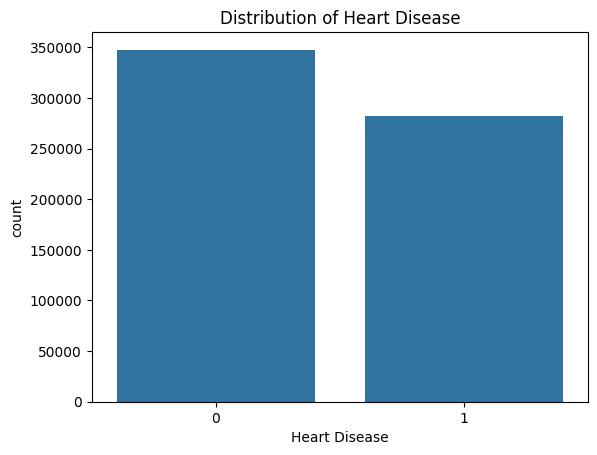

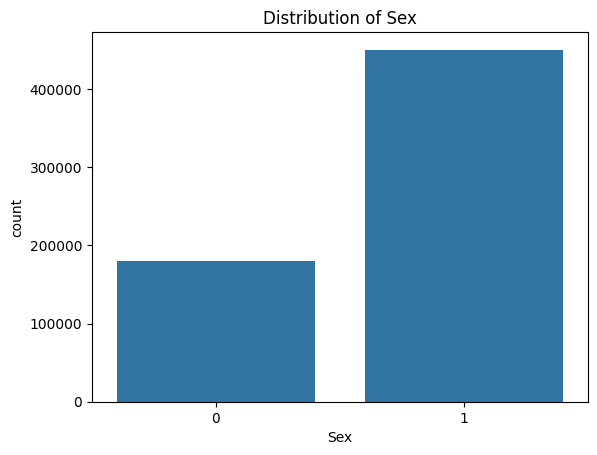

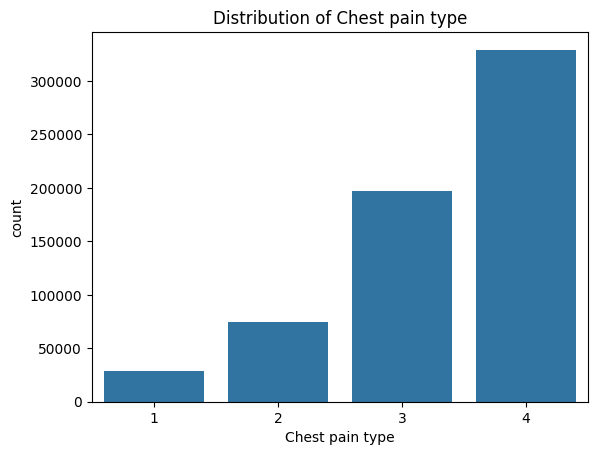

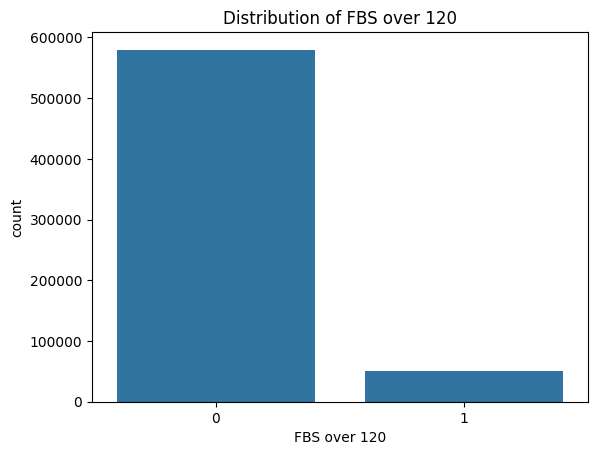

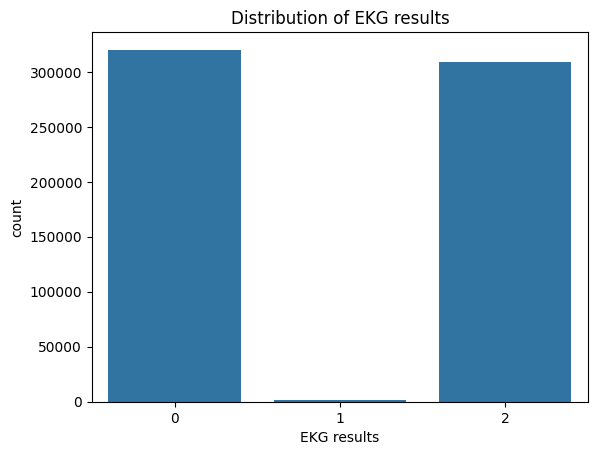

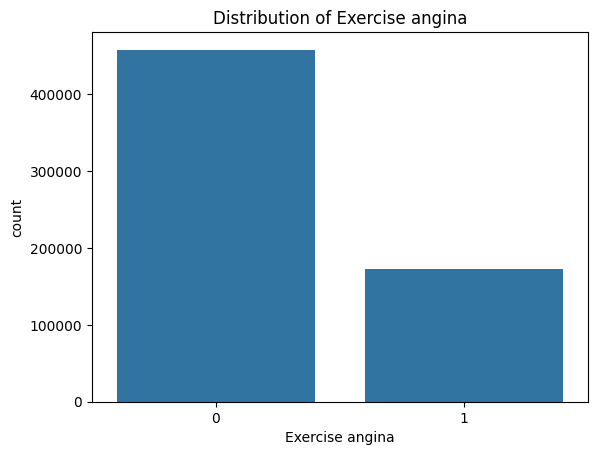

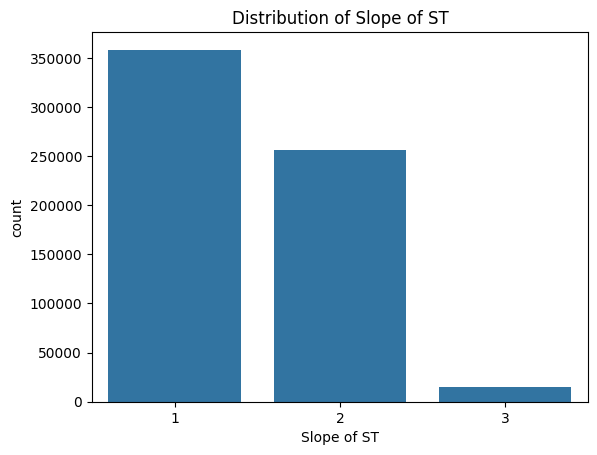

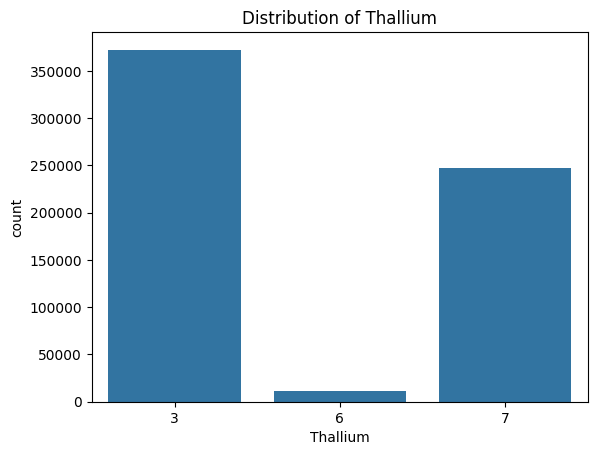

In [215]:
cat_cols = ['Heart Disease','Sex', 'Chest pain type', 'FBS over 120',
            'EKG results', 'Exercise angina',
            'Slope of ST', 'Thallium']

for col in cat_cols:
    sns.countplot(x=train_df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

<b>Interpretation</b>
- The Target parameter has a low imbalance , so no need to use SMOTE for this
- Distribution of sex is imbalanced and model can be Gender Bias but it is not extremly imbvalanced and we can keep it as it is in 0-1 category
- Distribution of chest pain is ordinal and there is high imbalance between categories, but high pain can be a indication of Diesease so insted of resampling it let's use it but also study the model if it is linearly coorelacorelated and model starts generalisung results then will use one-hot encoding
- FBS Fasting Blood sugar is highly impbalanced model may ignore 1 but will not rebalance it because our target parameter is almost balanced
- 

ML Model

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [217]:
X = train_df.drop(columns=['id','Heart Disease'])
y = train_df['Heart Disease']

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42,test_size= .20)

In [219]:
lg_r = LogisticRegression()
lg_r.fit(X_train,y_train)

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [220]:
y_prob = lg_r.predict_proba(X_test)[:,1]

In [221]:
y_pred = (y_prob > 0.5).astype(int)

In [222]:
print('Classification Report : \n',classification_report(y_test,y_pred))
print('Area Under Curve (AUC) - Receiver Operating Characteristic (ROC) Score :\n',roc_auc_score(y_test,y_prob))

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     69564
           1       0.88      0.85      0.87     56436

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000

Area Under Curve (AUC) - Receiver Operating Characteristic (ROC) Score :
 0.9488379068131495


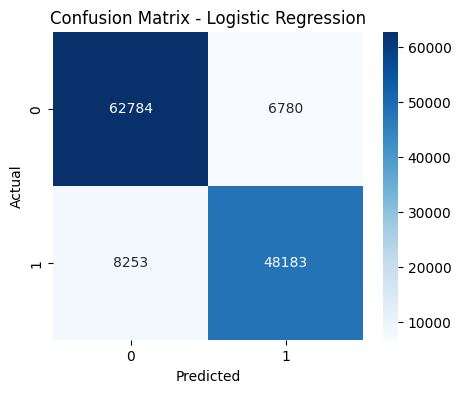

[[62784  6780]
 [ 8253 48183]]


In [223]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(cm)

<b>Conculsions:</b>
- AUC-ROC (reciver operationg charactersitcs) shows that model is good to classify the the Diesese
- by precision we can see that there are few false 12% cases or flasely detected
- by recall we ca see that there is in 15% cases were not detected which is not good if we miss any positve heart diesease

<b>Tuning the Threshold</b>

In [224]:
y_pred = (y_prob > 0.3).astype(int)

In [225]:
print('Classification Report : \n',classification_report(y_test,y_pred))
print('Area Under Curve (AUC) - Receiver Operating Characteristic (ROC) Score :\n',roc_auc_score(y_test,y_prob))

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     69564
           1       0.81      0.92      0.86     56436

    accuracy                           0.87    126000
   macro avg       0.87      0.87      0.87    126000
weighted avg       0.87      0.87      0.87    126000

Area Under Curve (AUC) - Receiver Operating Characteristic (ROC) Score :
 0.9488379068131495


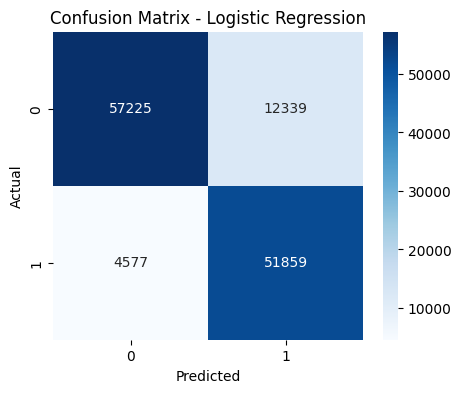

[[57225 12339]
 [ 4577 51859]]


In [226]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(cm)

By Reducing theshold the recall incrases so the rate of missing the disease is low but by the Precision it is visible that the rate of false alarms incrased 
- let's try to finout a way where we can increase recall without or less harming the precision 

# XGboost

In [227]:
from xgboost import XGBClassifier

In [228]:
# Compute Class Imbalance Ratio
neg = sum(y_train == 0)
pos = sum(y_train == 1)

scale_pos_weight = neg / pos
print(scale_pos_weight)

1.2299108920528454


In [229]:



xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]
threshold = 0.3# try 0.1, 0.2, 0.3

y_pred = (y_prob >= threshold).astype(int)


print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/xgboost/training.py:200: UserWarning: [23:58:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.81      0.87     69564
           1       0.80      0.94      0.86     56436

    accuracy                           0.87    126000
   macro avg       0.87      0.87      0.87    126000
weighted avg       0.88      0.87      0.87    126000

ROC-AUC: 0.9551296406881163


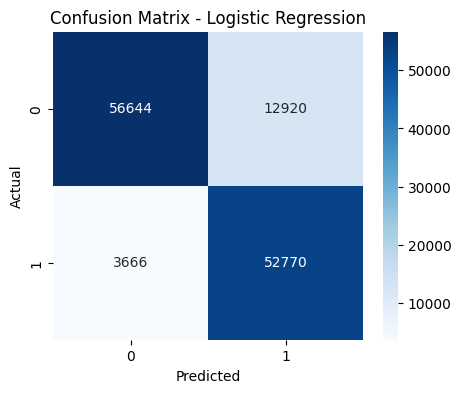

[[56644 12920]
 [ 3666 52770]]


In [230]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(cm)

- By the comparision we can say the current model is having slightly better results, and both Logistic regression and XG boost Shows similar results.
- So lets continoue with the XG boost to predice labels for test_df

In [231]:
id = test_df['id']
test_df.drop(columns=['id'], inplace=True)

In [232]:
y_prob = xgb.predict_proba(test_df)[:,1]
threshold = 0.3# try 0.1, 0.2, 0.3
y_pred = (y_prob >= threshold).astype(int)

In [233]:
test_df.insert(0, 'id', id)


In [234]:
test_df.insert(len(test_df.columns), 'Heart Disease', y_pred)

In [235]:
test_df['Heart Disease'] = test_df['Heart Disease'].map({1: 'Presence', 0 : 'Absence'})

In [236]:
test_df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3,Presence
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3,Absence
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7,Presence
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3,Absence
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,899995,58,1,2,120,222,0,0,172,0,1.0,1,0,7,Absence
269996,899996,58,1,4,132,289,0,0,172,0,2.8,2,0,3,Presence
269997,899997,63,1,3,108,201,1,0,158,0,0.8,1,0,3,Absence
269998,899998,59,1,4,120,274,0,2,163,0,0.5,1,0,3,Absence
